# Annotate RBC-GEM

## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    MODEL_PATH,
    get_annotation_df,
    compare_tables,
    visualize_comparison,
    read_rbc_model,
    write_rbc_model,
    split_string,
    show_versions,
)

from rbc_gem_utils.annotation import set_sbo_default_annotations
# Display versions of last time notebook ran and worked
show_versions()


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
cobra      0.29.0
depinfo     2.2.0
matplotlib  3.8.2
memote     0.16.1
notebook    7.0.6
requests   2.31.0
scipy      1.11.4
seaborn    0.13.0

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
--------------------
Darwin  22.6.0-x86_64
CPython        3.12.0


### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.3.0

In [3]:
old_model = read_rbc_model(filetype="xml")
old_model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,RBC_GEM
Memory address,146b30920
Number of metabolites,292
Number of reactions,348
Number of genes,283
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Set annotations on model

In [4]:
replace_annotations = True
annotation_types = ["reactions", "metabolites", "genes"]
model = old_model.copy()

for annotation_type in annotation_types:
    df_annotation = pd.read_csv(
        f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
        sep="\t", 
        index_col=0,
        dtype=str,
    )
    for idx, row in df_annotation.set_index(annotation_type).iterrows():
        try:
            item = getattr(model, annotation_type).get_by_id(idx)
        except KeyError:
            continue
        values = {k: split_string(v) for k, v in row.dropna().to_dict().items()}
        values.update({k: v[0] for k, v in values.items() if len(v) == 1})
        if replace_annotations:
            item.annotation = values
        else:
            item.annotation.update(values)
df_annotation

Read LP format model from file /var/folders/5t/hk8m3g6d1jn25x5rssjgsrmm0000gn/T/tmp0i_qvfh1.lp
Reading time = 0.00 seconds
: 292 rows, 696 columns, 2378 nonzeros


,genes,hprd,ncbigi,sbo,uniprot.chain,dbsnp,uniprot,uniprot.isoform,refseq,ncbigene,hgnc.symbol,drugbank,ccds,ensembl,mgi,mim
0,ABCC4,NaN,NaN,SBO:0000243,PRO_0000093362,rs11568681,O15439,O15439-1,NP_001098985.1;NP_001288758.1;NP_001288759.1;N...,10257,ABCC4,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,CCDS45061.1;CCDS76643.1;CCDS86356.1;CCDS9474.1,ENSG00000125257,MGI:2443111,605250
1,ABCG2,NaN,NaN,SBO:0000243,PRO_0000093386,rs2231137,Q9UNQ0,Q9UNQ0-1,NP_001244315.1;NP_004818.2;XP_005263412.1;XP_0...,9429,ABCG2,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,CCDS3628.1;CCDS58910.1,ENSG00000118777,MGI:1347061;MGI:1351624,138900;603756;614490
2,ACP1,NaN,NaN,SBO:0000243,PRO_0000046558,rs11691572,P24666,P24666-1,NP_004291.1;NP_009030.1,52,ACP1,DB04214;DB00173,CCDS1639.1;CCDS1640.1;CCDS46217.1,NaN,MGI:87881,171500
3,ACSL1,NaN,NaN,SBO:0000243,PRO_0000193104,NaN,P33121,P33121-1,NP_001273637.1;NP_001273639.1;NP_001273640.1;N...,2180,ACSL1,DB00131;DB00171,CCDS3839.1;CCDS68826.1,ENSG00000151726,MGI:102797,152425
4,ADA,NaN,NaN,SBO:0000243,PRO_0000194352,rs73598374,P00813,P00813-1,NP_000013.2,100,ADA,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,CCDS13335.1,ENSG00000196839,MGI:87916,102700;608958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,UMPS,02022,NaN,SBO:0000243,PRO_0000139649,rs17843776,P11172,P11172-1,NP_000364.1,7372,UMPS,DB02890;DB00544,CCDS3029.1,ENSG00000114491,MGI:1298388,258900;613891
279,UROD,NaN,NaN,SBO:0000243,PRO_0000187569,rs11541959,P06132,P06132-1,NP_000365.3,7389,UROD,DB03727;DB04461,CCDS518.1,ENSG00000126088,MGI:98916,176100;613521
280,UROS,NaN,NaN,SBO:0000243,PRO_0000135251,rs773301339,P10746,P10746-1,NP_000366.1,7390,UROS,NaN,CCDS7648.1,ENSG00000188690,MGI:98917,263700;606938
281,XYLB,06812,NaN,SBO:0000243,PRO_0000230985,rs17118,O75191,O75191-1,NP_005099.2,9942,XYLB,NaN,CCDS2678.1,ENSG00000093217,MGI:2142985,604049


### Add/reset SBO annotations

In [5]:
model = set_sbo_default_annotations(model, ["reactions", "metabolites", "genes"], verbose=True)
model

SBO term set for CDIPT
SBO term set for CDS
SBO term set for CEPTC
SBO term set for CEPTE
SBO term set for DAGK
SBO term set for GPAT
SBO term set for LPAAT
SBO term set for LPCLPLB
SBO term set for PCPLA2
SBO term set for PI45P5P
SBO term set for PI45PLC
SBO term set for PI4PLC
SBO term set for PIPLC
SBO term set for PI4K
SBO term set for PI4P5K
SBO term set for PI4PP
SBO term set for PAPP
SBO term set for cdpdag_hs_c
SBO term set for pail_hs_c
SBO term set for pa_hs_c
SBO term set for dag_hs_c
SBO term set for pc_hs_c
SBO term set for pe_hs_c
SBO term set for FAcoa_hs_c
SBO term set for lpa_hs_c
SBO term set for lpc_hs_c
SBO term set for FA_hs_c
SBO term set for pail45p_hs_c
SBO term set for pail4p_hs_c


Name,RBC_GEM
Memory address,147660c50
Number of metabolites,292
Number of reactions,348
Number of genes,283
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


### Compare before overwriting

In [6]:
df_old_model = {}
for annotation_type in annotation_types:
    all_annotation_keys = set()
    for annotation in getattr(old_model, annotation_type).list_attr("annotation"):
        all_annotation_keys.update(list(annotation.keys()))
    # Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
    df_old_model[annotation_type] = get_annotation_df(
        getattr(old_model, annotation_type), 
        sorted(list(all_annotation_keys))
    ).rename({"id": annotation_type}, axis=1)

df_new_model = {}
for annotation_type in annotation_types:
    all_annotation_keys = set()
    for annotation in getattr(model, annotation_type).list_attr("annotation"):
        all_annotation_keys.update(list(annotation.keys()))
    # Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
    df_new_model[annotation_type] = get_annotation_df(
        getattr(model, annotation_type), 
        sorted(list(all_annotation_keys))
    ).rename({"id": annotation_type}, axis=1)

<Axes: xlabel='reactions'>

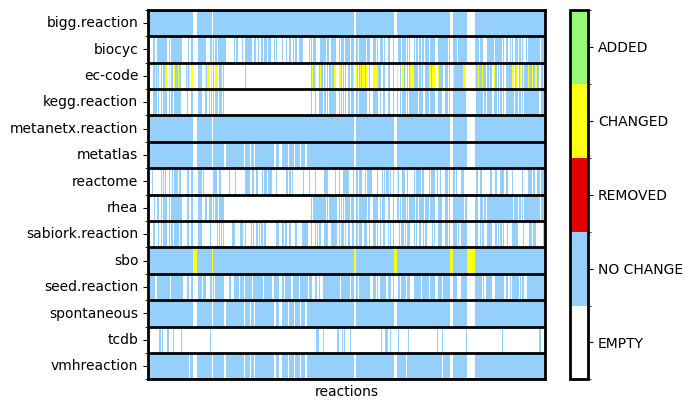

In [7]:
annotation_type = "reactions"
df_comparision = compare_tables(
    df_old_model[annotation_type].set_index(annotation_type),
    df_new_model[annotation_type].set_index(annotation_type),
)
visualize_comparison(df_comparision)

<Axes: xlabel='metabolites'>

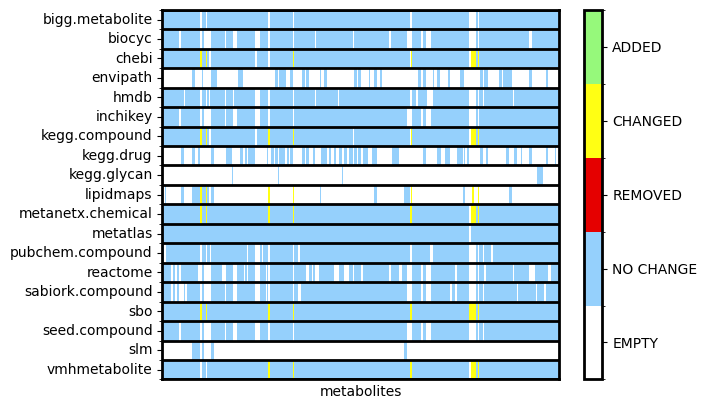

In [8]:
annotation_type = "metabolites"
df_comparision = compare_tables(
    df_old_model[annotation_type].set_index(annotation_type),
    df_new_model[annotation_type].set_index(annotation_type),
)
visualize_comparison(df_comparision)

<Axes: xlabel='genes'>

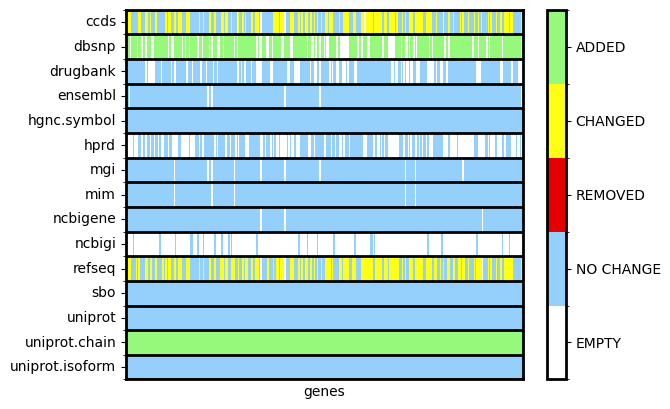

In [9]:
annotation_type = "genes"
df_comparision = compare_tables(
    df_old_model[annotation_type].set_index(annotation_type),
    df_new_model[annotation_type].set_index(annotation_type),
)
visualize_comparison(df_comparision)

## Export model

In [10]:
# write_rbc_model(model, filetype="all")